In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
# 指定Google Drive云端硬盘的根目录，名为drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
# 指定當前的工作資料夾
import os
# 此處為google drive中的檔案路徑,drive為之前指定的工作根目錄，要加上
os.chdir("drive/Colab Notebooks") 

In [0]:
os.chdir("0713") 

In [8]:
ls

0607_XGBoost_colab_version.ipynb  result0713A.csv    test_1w_0713A.csv
0713CD.ipynb                      result0713B_1.csv  test_1w_0713B.csv
D_0713B_3.csv                     result0713B_2.csv  test_1w_0713C.csv
D_0713C_1.csv                     result0713B_4.csv  test.csv
result0713A_1.csv                 result0713B_5.csv  train_6w_0713A.csv
result0713A_2.csv                 result0713B.csv    train_6w_0713B.csv
result0713A_3.csv                 result0713C.csv    train_6w_0713C.csv
result0713A_4.csv                 submit_test.csv    train.csv


In [0]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from google.colab import files

#匯入訓練資料
#雲端匯入
df = pd.read_csv('./train_6w_0713B.csv', encoding='utf-8')
# Dataset is now stored in a Pandas Dataframe

#匯入資料
#df = pd.read_csv('.\dataset\train_6w_0607.csv',encoding='utf-8') 
#student = pd.read_csv('student.csv', index_col = 0)

1）DataFrame數據屬性
df_obj = DataFrame() #創建DataFrame
df_obj.dtypes #查各行data format
df_obj['columns'].astype(int) #轉數據type format
df_obj.head() #查看前幾行的數據，default: 5 lines
df_obj.tail() #查看後面幾行的數據, default: 5 lines
df_obj.index #查看索引
df_obj.columns #查看columns
df_obj.values #查看values
df_obj.describe() #敘述統計值
df_obj.T #轉換
df_obj.sort_values(by=['',''])#同上
df.drop(['B', 'C'], axis=1) #刪除column['B','C'], axis=0則是刪除row data.
df.shape[0]找columns length、df.shape[0] 找rows length

2）使用DataFrame選擇資料:
df_obj.iloc[1:4] #獲取1-3 Rows data,該操作分段得到Data
df_obj.iloc[columns_index] #獲取Columns Data
df_obj.iloc[1:4，[1,4]]#取1跟3 Columns的 1~3 Rows Data
data = data.iloc[:, 2:] 前兩columns不要

3）使用DataFrame重設數據
df_obj.iloc[1:4，[1,4]]=1 #所選位置Data = 1

3-1)轉浮點數
col = list(data.columns)#找所有columns
data[col] = data[col].apply(pd.to_numeric, errors='coerce').fillna(0.0)
#所有col補0，轉數值，Nan位置補0.0
data = pd.DataFrame(data, dtype='float') #再轉浮點數

4）使用DataFrame篩選數據(類似SQL中的WHERE):
alist = ['023-18996609823']
df_obj['用戶號碼'].isin(alist) #將要filter的Data放到 alist字典中, 使用isin對資料進行塞選,對每個索引及 Rows進行篩選結果,若是為符合則 = Ture

5）使用DataFrame模糊篩選資料(類似SQL中的LIKE):
df_obj[df_obj['套餐'].str.contains(r'.*?語音CDMA.*')] #使用正則表達式進行模糊篩選, * 表示多次的任意值, ?表示可出現一次的任意值

6）使用DataFrame進行數據轉換
df_obj['columns'] = df_obj['columns'].str.replace('公司(.{2,})分店','\\1')#可使用正則表達式
可以設置take_last=ture 保留最後一個,或保留開始一個. 補充:注意take_last=ture不使用,改為 keep=’last

7）使用pandas中讀取數據:
read_csv('D:\LQJ.csv',sep=';',nrows=2) #首先輸入入csv檔案位置,然後分割符號選擇等等
df.to_excel('foo.xlsx',sheet_name='Sheet1');
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])#寫入讀取excel數據，pd.read_excel讀取的數據是以DataFrame形式存儲

8）使用pandas聚合數據(類似SQL中的GROUP BY 或HAVING):
data_obj['用戶名稱'].groupby(data_obj['銀行分行'])
data_obj.groupby('銀行分行')['用戶名稱'] #上面簡易寫法
adsl_obj.groupby('銀行分行')['用戶名稱'].agg([('C1','count')])#依照銀行分行進行匯總對用戶名稱進行計算,並將計算列命名為C1

9）使用pandas合併數據集(類似SQL中的JOIN):
merge(mxj_obj2, mxj_obj1 ,on='用戶標示',how='inner') # mxj_obj1和mxj_obj2將用戶標示當成重疊Column Key合併兩筆Data, inner表示取兩筆Data的交集(And).

10）清理Data
df[df.isnull()]
df[df.notnull()]
df.dropna()#將所有含有nan項目row刪除
df.dropna(axis=1,thresh=3) #將在Columns 的三個 NaN項目刪除 (空值刪除)
df.dropna(how='ALL')#將全部內容nan的 row 刪除填充值
df.fillna(0) #空值補0
df.fillna({1:0,2:0.5}) #對1-Columns nan = 0，2_columns = 0.5
df.fillna(method='ffill') #在columns的前一項給 = NaN?

In [144]:
df.columns

Index(['building_material', 'city', 'txn_dt', 'total_floor', 'building_type',
       'building_use', 'building_complete_dt', 'parking_way', 'land_area',
       'building_area',
       ...
       'XIV_index_5000', 'XIV_10000', 'XIV_index_10000', 'XIV_MIN',
       'total_price', 'total_land', 'year_class', 'year_land', 'floor_class',
       'edu'],
      dtype='object', length=229)

In [145]:
df.shape[0]

59629

In [146]:
df.iloc[0:5,0:6] # or df.iloc[0:5,[0,1,2,3,4,5]]顯示row 0~4, col 0~5

,building_material,city,txn_dt,total_floor,building_type,building_use
0,8,21,18674,4,3,2
1,8,7,18800,5,1,2
2,8,7,19289,4,1,2
3,8,21,20385,24,0,2
4,1,21,20657,2,4,2


In [147]:
col = list(df.columns)
print(col)
df[col] = df[col].apply(pd.to_numeric, errors='coerce').fillna(0.0)
df2 = pd.DataFrame(df, dtype='float') #轉浮點數

['building_material', 'city', 'txn_dt', 'total_floor', 'building_type', 'building_use', 'building_complete_dt', 'parking_way', 'land_area', 'building_area', 'town', 'lat', 'lon', 'village_income_median', 'town_population', 'town_area', 'town_population_density', 'born_rate', 'death_rate', 'marriage_rate', 'divorce_rate', 'village', 'N_50', 'N_500', 'N_1000', 'N_5000', 'N_10000', 'I_10', 'I_50', 'I_index_50', 'I_100', 'I_250', 'I_500', 'I_index_500', 'I_1000', 'I_index_1000', 'I_5000', 'I_index_5000', 'I_10000', 'I_index_10000', 'I_MIN', 'II_10', 'II_50', 'II_index_50', 'II_100', 'II_250', 'II_500', 'II_index_500', 'II_1000', 'II_index_1000', 'II_5000', 'II_index_5000', 'II_10000', 'II_index_10000', 'II_MIN', 'III_10', 'III_50', 'III_index_50', 'III_100', 'III_250', 'III_500', 'III_index_500', 'III_1000', 'III_index_1000', 'III_5000', 'III_index_5000', 'III_10000', 'III_index_10000', 'III_MIN', 'IV_10', 'IV_50', 'IV_index_50', 'IV_100', 'IV_250', 'IV_500', 'IV_index_500', 'IV_1000', 'IV

In [148]:
data = df2.drop(["total_price"], axis=1) #剔除 y
X = data 
y = df2.total_price #選擇 y
y.dtypes


dtype('float64')

In [0]:
#X_matrix = X.as_matrix()
#y_matrix = y.as_matrix()

In [149]:
#切割訓練70%跟測試30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0005, random_state=0)

# XGBoost參數設定
#for xgb.train() model
'''params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda
    ': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.33,
    'seed': 1000,
    'nthread': 4,
    }'''


"params = {\n    'booster': 'gbtree',\n    'objective': 'reg:gamma',\n    'gamma': 0.1,\n    'max_depth': 5,\n    'lambda\n    ': 3,\n    'subsample': 0.7,\n    'colsample_bytree': 0.7,\n    'min_child_weight': 3,\n    'silent': 1,\n    'eta': 0.33,\n    'seed': 1000,\n    'nthread': 4,\n    }"

In [0]:
#X_test.columns

In [150]:
#dtrain = xgb.DMatrix(X_train, y_train) #轉DMatrix
#dtest = xgb.DMatrix(X_test)#轉DMatrix

#num_rounds = 300 #訓練的迭代次數 for xgb.train()訓練模型
#plst = params.items()#XGBoost參數 for xgb.train()訓練模型
#model = xgb.train(plst, dtrain, num_rounds) #for xgb.train()訓練模型
#----------------------------------------------------------------------
#for xgb.XGBRegressor() model
model = xgb.XGBRegressor(
    colsample_bylevel=0.7,
    colsample_bytree = 0.75,
    max_depth = 7, 
    gamma=0,
    min_child_weight=4,    
    learning_rate = 0.033,
    max_delta_step=0,
    missing=None,
    n_estimators = 30000,
    nthread= -1,
    silent = True,
    objective = 'reg:gamma', #'reg:linear', 'reg:linear' 
    reg_lambda = 0.8,
    scale_pos_weiht = 1,
    seed = 1234,
    subsample = 1,
    default='gpu_predictor',
    tree_method = 'gpu_hist',
    gpu_id = 0,
    max_bin = 256 
    )

model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=0.75, default='gpu_predictor',
             gamma=0, gpu_id=0, importance_type='gain', learning_rate=0.033,
             max_bin=256, max_delta_step=0, max_depth=7, min_child_weight=4,
             missing=None, n_estimators=30000, n_jobs=1, nthread=-1,
             objective='reg:gamma', random_state=0, reg_alpha=0, reg_lambda=0.8,
             scale_pos_weight=1, scale_pos_weiht=1, seed=1234, silent=True,
             subsample=1, tree_method='gpu_hist', verbosity=1)

In [0]:
import numpy as np
#MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [152]:
#代入測試集進行預測
#y_hat = model.predict(dtest)
y_hat = model.predict(X_test)

MAPE = mean_absolute_percentage_error(y_test, y_hat) #(y_real, y_hat)
print("MAPE ="+ "%.2f" % MAPE + "%" )

MAPE =11.54%


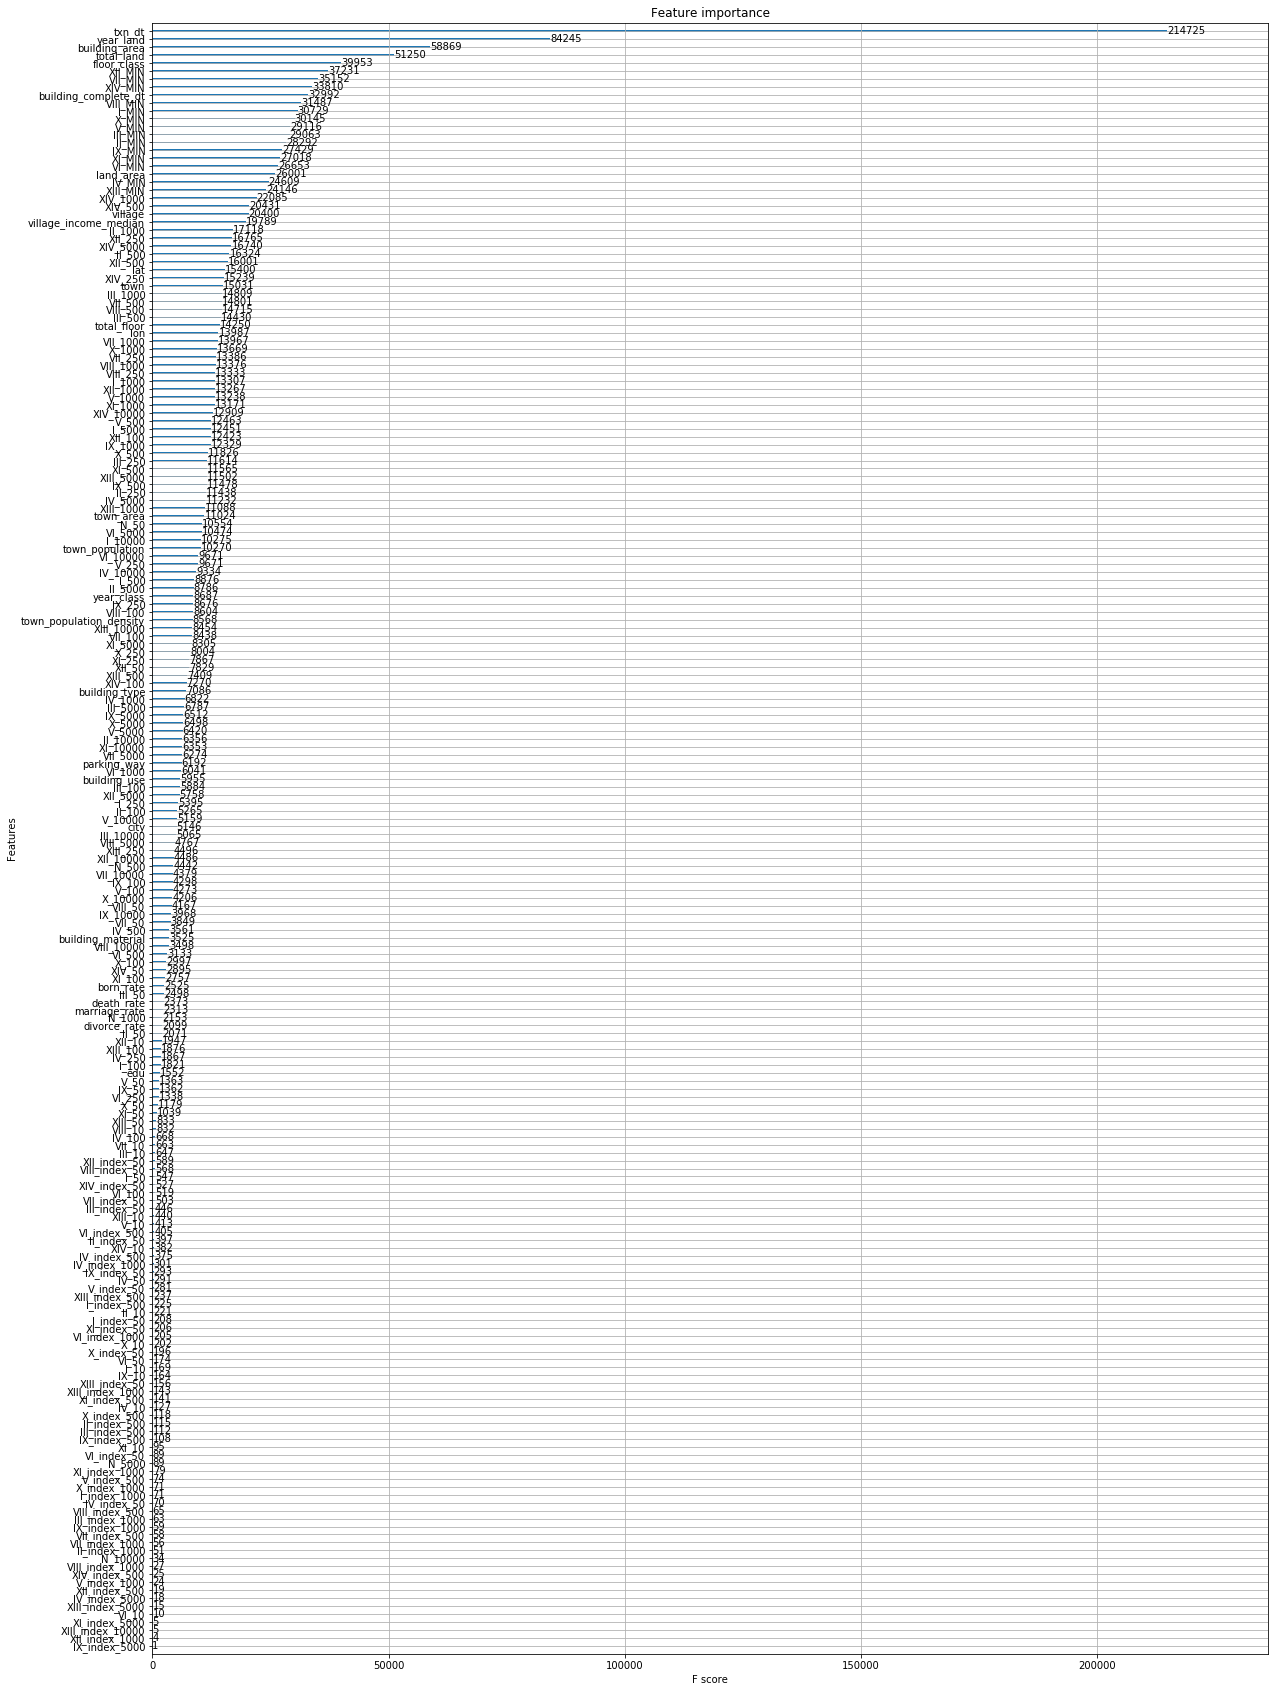

In [153]:
# 顯現重要Columns
fig, ax = plt.subplots(figsize=(20,30))
plot_importance(model, ax=ax)

In [0]:
#save_results_to = 'D:\Storage\專題\python'
#plt.savefig(save_results_to + '\image.png', dpi = 300)

In [154]:
ls

0607_XGBoost_colab_version.ipynb  D_0713C_9.csv      result0713C.csv
0713CD.ipynb                      result0713A_1.csv  submit_test.csv
D_0713B_3.csv                     result0713A_2.csv  test_1w_0713A.csv
D_0713C_1.csv                     result0713A_3.csv  test_1w_0713B.csv
D_0713C_2.csv                     result0713A_4.csv  test_1w_0713C.csv
D_0713C_3.csv                     result0713A.csv    test.csv
D_0713C_4.csv                     result0713B_1.csv  train_6w_0713A.csv
D_0713C_5.csv                     result0713B_2.csv  train_6w_0713B.csv
D_0713C_6.csv                     result0713B_4.csv  train_6w_0713C.csv
D_0713C_7.csv                     result0713B_5.csv  train.csv
D_0713C_8.csv                     result0713B.csv


In [155]:
#匯入玉山測試集資料
#uploaded = files.upload()
#雲端匯入
#dftest = pd.read_csv(io.BytesIO(uploaded['test_1w_0607.csv']))
dftest = pd.read_csv('./test_1w_0713B.csv', encoding='utf-8')

#dftest = pd.read_csv('E:\專題\python\h_tdata_var_1w.csv',encoding='utf-8')
dftest.iloc[0:5,:]

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,born_rate,death_rate,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,N_5000,N_10000,I_10,I_50,I_index_50,I_100,I_250,I_500,I_index_500,I_1000,I_index_1000,I_5000,I_index_5000,I_10000,I_index_10000,...,XII_1000,XII_index_1000,XII_5000,XII_index_5000,XII_10000,XII_index_10000,XII_MIN,XIII_10,XIII_50,XIII_index_50,XIII_100,XIII_250,XIII_500,XIII_index_500,XIII_1000,XIII_index_1000,XIII_5000,XIII_index_5000,XIII_10000,XIII_index_10000,XIII_MIN,XIV_10,XIV_50,XIV_index_50,XIV_100,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_land,year_class,year_land,floor_class,edu
0,1,13,18634,2,4,2,1857,2,40.317789,3.418175,66,-37.72,119.45,714.0,122155.0,21.8424,5593.0,9.30,6.53,5.99,2.04,160,1,13,14,14,14,0,0,0,0,2,5,1,10,1,187,1,708,1,...,182,1,3813,1,14640,1,65.480263,0,0,0,0,20,24,1,25,1,501,1,1502,1,100.611287,0,0,0,0,7,21,1,129,1,3991,1,8409,1,105.462231,43.735964,1,404.567409,138.0,0.109467
1,8,7,20199,10,3,2,16011,2,18.144460,7.726227,4,-37.70,119.17,583.0,114926.0,191.4508,600.0,7.94,5.93,6.11,2.50,843,0,8,12,14,14,0,0,0,1,1,3,1,6,1,68,1,327,1,...,82,1,1012,1,4576,1,63.534081,0,0,0,1,1,2,1,3,1,28,1,298,1,95.594156,0,0,0,0,18,44,1,67,1,1950,1,10725,1,100.819809,25.870688,3,22.890510,99.0,0.052297
2,8,12,19769,4,4,10,18294,2,47.912742,12.170581,52,-38.03,118.24,641.0,274819.0,62.7034,4383.0,8.79,6.12,6.26,2.29,645,1,9,11,14,14,0,0,0,0,0,0,0,4,1,147,1,567,1,...,123,1,3072,1,11765,1,26.913148,0,0,0,0,0,0,0,0,0,21,1,146,1,2850.419308,0,0,0,0,0,3,1,35,1,3707,1,19459,1,259.800543,60.083323,4,51.775828,138.0,0.054726
3,10,7,20479,19,2,0,17837,2,2.222000,2.252256,204,-37.70,119.34,653.0,222585.0,5.7138,38956.0,7.94,5.93,6.11,2.50,461,10,14,14,14,14,0,0,0,0,4,17,1,49,1,692,1,1685,1,...,754,1,13918,1,33527,1,0.550144,0,0,0,5,6,16,1,26,1,715,1,2499,1,84.444073,0,2,1,5,16,60,1,144,1,6487,1,29400,1,22.941906,4.474256,4,2.551121,106.0,0.052297
4,8,3,18164,13,0,2,13272,2,11.387227,5.813985,169,-37.74,119.59,624.0,38708.0,22.8283,1696.0,6.04,7.88,5.76,2.78,2390,2,11,13,14,14,0,0,0,0,2,3,1,10,1,217,1,360,1,...,109,1,1331,1,2412,1,70.134097,0,0,0,0,1,2,1,3,1,54,1,87,1,172.571716,0,0,0,0,4,18,1,76,1,1346,1,3280,1,181.213095,17.201212,3,15.584509,99.0,0.037986


In [156]:
dftest.shape[0]

10000

In [157]:
dcol = list(dftest.columns)
print(dcol)
dftest[dcol] = dftest[dcol].apply(pd.to_numeric, errors='coerce')
df_test2 = pd.DataFrame(dftest, dtype='float') #轉浮點數

['building_material', 'city', 'txn_dt', 'total_floor', 'building_type', 'building_use', 'building_complete_dt', 'parking_way', 'land_area', 'building_area', 'town', 'lat', 'lon', 'village_income_median', 'town_population', 'town_area', 'town_population_density', 'born_rate', 'death_rate', 'marriage_rate', 'divorce_rate', 'village', 'N_50', 'N_500', 'N_1000', 'N_5000', 'N_10000', 'I_10', 'I_50', 'I_index_50', 'I_100', 'I_250', 'I_500', 'I_index_500', 'I_1000', 'I_index_1000', 'I_5000', 'I_index_5000', 'I_10000', 'I_index_10000', 'I_MIN', 'II_10', 'II_50', 'II_index_50', 'II_100', 'II_250', 'II_500', 'II_index_500', 'II_1000', 'II_index_1000', 'II_5000', 'II_index_5000', 'II_10000', 'II_index_10000', 'II_MIN', 'III_10', 'III_50', 'III_index_50', 'III_100', 'III_250', 'III_500', 'III_index_500', 'III_1000', 'III_index_1000', 'III_5000', 'III_index_5000', 'III_10000', 'III_index_10000', 'III_MIN', 'IV_10', 'IV_50', 'IV_index_50', 'IV_100', 'IV_250', 'IV_500', 'IV_index_500', 'IV_1000', 'IV

In [158]:
df_test2.dtypes #浮點數確認

building_material          float64
city                       float64
txn_dt                     float64
total_floor                float64
building_type              float64
building_use               float64
building_complete_dt       float64
parking_way                float64
land_area                  float64
building_area              float64
town                       float64
lat                        float64
lon                        float64
village_income_median      float64
town_population            float64
town_area                  float64
town_population_density    float64
born_rate                  float64
death_rate                 float64
marriage_rate              float64
divorce_rate               float64
village                    float64
N_50                       float64
N_500                      float64
N_1000                     float64
N_5000                     float64
N_10000                    float64
I_10                       float64
I_50                

In [159]:
data_test = df_test2[X_test.columns]
data_test.shape[0]

10000

In [160]:
#做測試集預測
y_hat_test = model.predict(data_test)
pdata=pd.DataFrame(y_hat_test)
test_yhat = pdata.rename(columns={0: 'total_price'})
print(test_yhat.shape[0])

10000


In [0]:
#匯入訓練資料
#uploaded = files.upload()
#雲端匯入
#summit = pd.read_csv(io.BytesIO(uploaded['submit_test.csv']))
summit = pd.read_csv('./submit_test.csv', encoding='utf-8')
#summit = pd.read_csv('E:\專題\dataset\submit_test.csv',encoding='utf-8')
summit = summit.drop(["total_price"], axis=1) #剔除 old total.price

In [162]:
summit_new = pd.concat([summit, test_yhat],axis=1) 
summit_new .iloc[:5,:3]

,building_id,total_price
0,X5gsdTWGS3W7JJQB,11184203.00
1,BTshNOJyKHnT2YIT,3949631.25
2,dhdymr0lV8N5kZOT,9005978.00
3,VEwyGGMcD56w5BOc,5860368.50
4,wmUeMoJZfsqaSX9b,1067515.00


In [163]:
summit_new.shape[0]

10000

In [0]:
summit_new.to_csv('D_0713B_6.csv', sep=',', encoding='utf-8',index=0) #不保存行索引
from google.colab import files
files.download('D_0713B_6.csv')